In [3]:
import numpy as np
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Convolution2D, Flatten
from keras.optimizers import Adam
from keras.datasets import cifar10


In [38]:
(X_train, Y_train), (X_test, Y_test)= cifar10.load_data()

In [39]:
X_train.shape,Y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [40]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [41]:
Y_train[10]

array([4], dtype=uint8)

In [42]:
Y_test[0]

array([3], dtype=uint8)

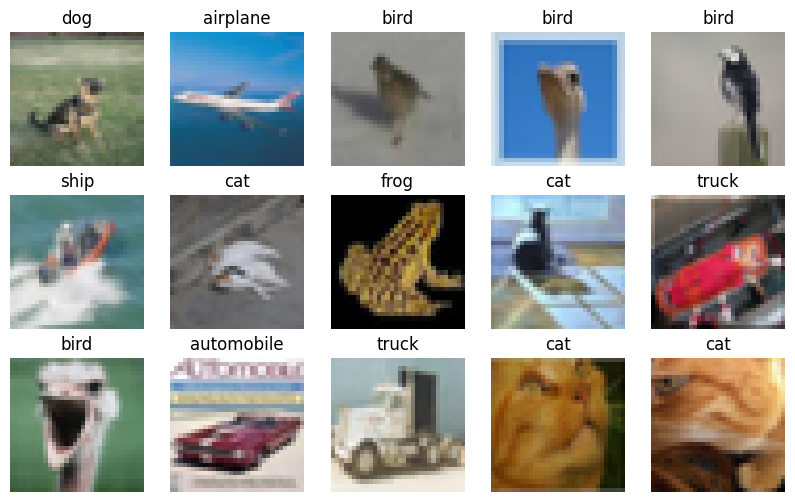

In [43]:
'''import matplotlib.pyplot as plt

# Define the labels for the CIFAR-10 dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def display_samples(X, Y, num_rows=3, num_cols=5):
    """
    Display a random selection of images from X, with labels from Y.

    Parameters:
        X (numpy array): The image data.
        Y (numpy array): The labels for the image data.
        num_rows (int): Number of rows in the subplot grid.
        num_cols (int): Number of columns in the subplot grid.
    """
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

    for i in range(num_rows):
        for j in range(num_cols):
            idx = np.random.randint(0, len(X))
            axes[i, j].imshow(X[idx])
            axes[i, j].set_title(labels[int(Y[idx])])
            axes[i, j].axis('off')

    plt.show()

# Display some samples from the training set
display_samples(X_train, Y_train)
'''

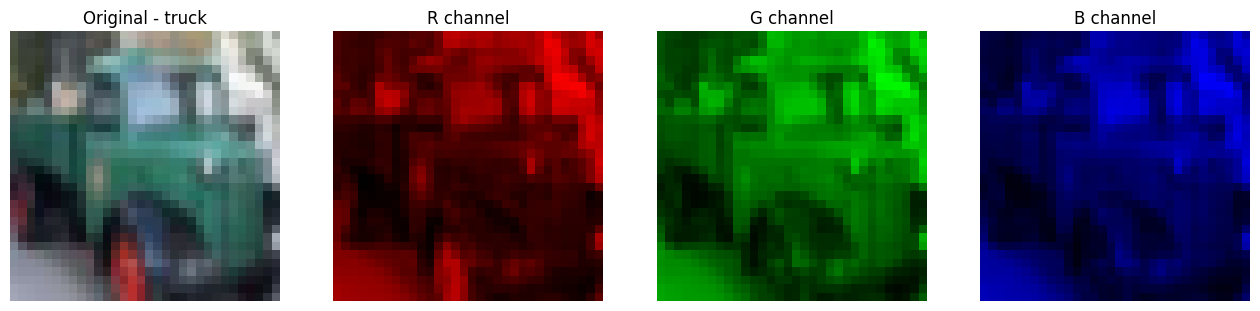

In [26]:
'''
def display_rgb_channels(image, label):
    """
    Display the R, G, B channels of a given image.

    Parameters:
        image (numpy array): The image whose channels are to be displayed.
        label (int): The label for the image.
    """
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    axes[0].imshow(image)
    axes[0].set_title(f'Original - {labels[label]}')
    axes[0].axis('off')

    for i, color in enumerate(['R', 'G', 'B']):
        channel_image = np.zeros_like(image)
        channel_image[:,:,i] = image[:,:,i]
        axes[i+1].imshow(channel_image)
        axes[i+1].set_title(f'{color} channel')
        axes[i+1].axis('off')

    plt.show()

# Randomly select an image from the training set
idx = np.random.randint(0, len(X_train))
image = X_train[idx]
label = int(Y_train[idx])

# Display the R, G, B channels for the selected image
display_rgb_channels(image, label)
'''

In [44]:
n_classes=10

In [45]:
Y_train = keras.utils.to_categorical(Y_train, n_classes)
Y_test = keras.utils.to_categorical(Y_test, n_classes)
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [46]:
model = Sequential()

In [47]:
model.add(Convolution2D(32,(3,3),padding='same',strides=(1,1),input_shape=X_train.shape[1:], activation = 'relu'))
model.add(Convolution2D(128,(5,5),padding='same', strides=(1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       102528    
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_2 (Dense)             (None, 10)                1310730   
                                                                 
Total params: 1414154 (5.39 MB)
Trainable params: 1414154 (5.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
model.fit(X_train, Y_train, batch_size=100, epochs=200, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/200
500/500 [==============================] - 11s 18ms/step - loss: 1.3959 - accuracy: 0.5062 - val_loss: 1.1524 - val_accuracy: 0.5928
Epoch 2/200
500/500 [==============================] - 8s 17ms/step - loss: 1.0271 - accuracy: 0.6423 - val_loss: 1.0161 - val_accuracy: 0.6411
Epoch 3/200
500/500 [==============================] - 9s 17ms/step - loss: 0.8699 - accuracy: 0.6991 - val_loss: 0.9760 - val_accuracy: 0.6629
Epoch 4/200
500/500 [==============================] - 9s 18ms/step - loss: 0.7486 - accuracy: 0.7423 - val_loss: 1.0049 - val_accuracy: 0.6660
Epoch 5/200
500/500 [==============================] - 9s 17ms/step - loss: 0.6426 - accuracy: 0.7790 - val_loss: 1.0019 - val_accuracy: 0.6688
Epoch 6/200
500/500 [==============================] - 10s 20ms/step - loss: 0.5287 - accuracy: 0.8188 - val_loss: 1.0527 - val_accuracy: 0.6716
Epoch 7/200
500/500 [==============================] - 9s 17ms/step - loss: 0.4327 - accuracy: 0.8529 - val_loss: 1.1567 - val_accurac

KeyboardInterrupt: ignored

In [64]:
image = np.expand_dims(X_test[0], axis=0)
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

1/1 [==============================] - 0s 30ms/step


In [65]:
prediction,predicted_label

(array([[2.1141121e-14, 5.8181301e-22, 3.6184007e-18, 1.0000000e+00,
         2.4725167e-20, 1.6508123e-13, 5.8262529e-24, 2.4942231e-25,
         1.5758513e-08, 5.3667545e-19]], dtype=float32),
 3)

In [66]:
Y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)